In [28]:
from screenTools import *
path = "/Users/rathbunc/Code/screen-processing/ScreenTools/data/AM_S22_screen/AM_2.21.22_Plate_20-21.xlsx"

data = importPlates(path, [1,1,2,2], ['104', '86', '104', '86'])
controls = ["A1", "A2", "A3", "H10", "H11", "H12"]
print("Got", data.shape[0], "datapoints.")
assignControls(data, controls)
pp = pivotPlates(data)
print(pp)
ratios = computeRatios(pp)
a = find_hits(ratios, -1, 1,2)
#export_to_pick(a, args["peptide1"], args["peptide2"])
a

Got 384 datapoints.
        plate_number row column     condition   value         
peptide                                           104       86
0                  1   A      1      positive  195801  1543256
1                  1   A     10  experimental   16519  1475882
2                  1   A     11  experimental    6579   460410
3                  1   A     12  experimental  155849  1840819
4                  1   A      2      positive  221433  1289382
..               ...  ..    ...           ...     ...      ...
187                2   H      5  experimental  356836  1522697
188                2   H      6  experimental  396113  1095203
189                2   H      7  experimental    3403   348361
190                2   H      8  experimental   42429  1356174
191                2   H      9  experimental       1        1

[192 rows x 6 columns]


plate_number row column     condition   value             104/86  \
peptide                                           104       86             
0                  1   A      1      positive  195801  1543256 -0.896623   
1                  1   A     10  experimental   16519  1475882 -1.951068   
2                  1   A     11  experimental    6579   460410 -1.844985   
3                  1   A     12  experimental  155849  1840819 -1.072307   
4                  1   A      2      positive  221433  1289382 -0.765139   
..               ...  ..    ...           ...     ...      ...       ...   
187                2   H      5  experimental  356836  1522697 -0.630145   
188                2   H      6  experimental  396113  1095203 -0.441676   
189                2   H      7  experimental    3403   348361 -2.010168   
190                2   H      8  experimental   42429  1356174 -1.504653   
191                2   H      9  experimental       1        1  0.000000   

           86/104          to_pick  
peptide                             
0        0.896623         positive  
1        1.951068               86  
2        1.844985  not significant  
3        1.072307               86  
4        0.765139         positive  
..            ...              ...  
187      0.630145              104  
188      0.441676              104  
189      2.010168  not significant  
190      1.504653  not significant  
191      0.000000  not significant  

[192 rows x 9 columns]

In [35]:
def plot_performance(data, peptide0, peptide1):

    fig = plt.figure(figsize=(10, 10))
    peptide0 = str(peptide0)
    peptide1 = str(peptide1)
    ratiostr = peptide0 + "/" + peptide1

    sns.scatterplot(x=("value", peptide0), y=ratiostr, data=data, hue="to_pick", s=120, alpha=.9)

def export_to_pick(data, peptide0, peptide1, fname_prefix="./output/"):
    """
    To a folder named "output" in the current path:
    CSV containing the selected mutants.
    PNGs of each performance plot.
    """
    stamp = datetime.now().strftime("%Y.%m.%d-%H.%M")
    fname = fname_prefix + str(peptide0) + "_" + str(peptide1) + "_" + stamp

    plot_performance(data, peptide0, peptide1)
    #plt.savefig(fname + "_" + str(peptide0) + ".png")
    plt.savefig(fname + "_" + str(peptide0) + ".pdf")

    plot_performance(data, peptide1, peptide0)
    #plt.savefig(fname + "_" + str(peptide1) + ".png")
    plt.savefig(fname + "_" + str(peptide1) + ".pdf")

    trimmed_data = data[(data["to_pick"] == peptide0) | (data["to_pick"] == peptide1)]
    sorted_data = trimmed_data.sort_values(
        ["to_pick", "plate_number", "row", "column"]
    )[["to_pick", "plate_number", "row", "column"]]

    sorted_data.to_csv(fname + ".csv")

    return sorted_data

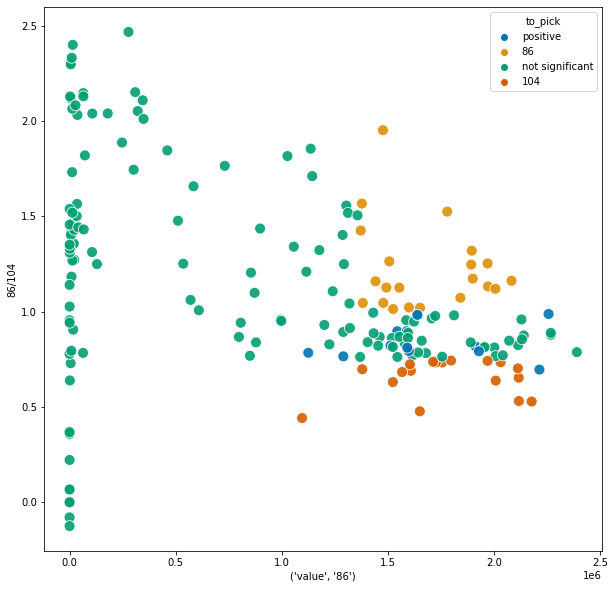

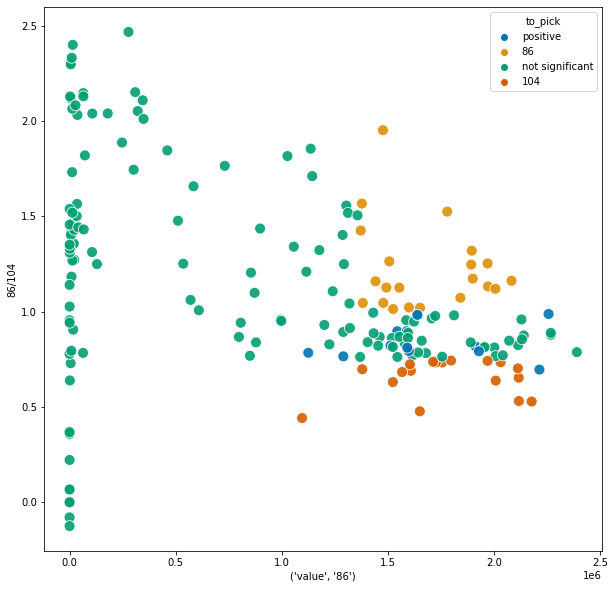

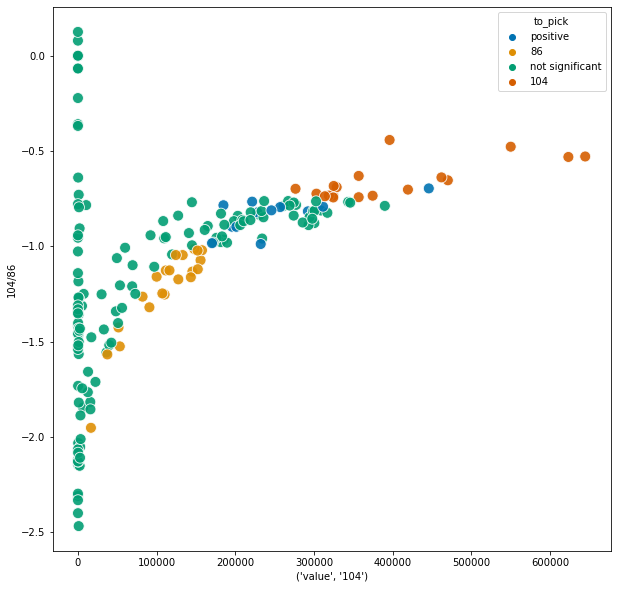

In [36]:
with sns.color_palette('colorblind'):
    plot_performance(a, '86', '104')
    export_to_pick(a, '86', '104')
